### DATA WRANGLING

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data[data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df = data.copy()
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
def change_into_datetime(col):
    df[col]= pd.to_datetime(df[col])


In [12]:
for feature in ["Date_of_Journey","Dep_Time","Arrival_Time"]:
    change_into_datetime(feature)

In [13]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
df["Date_of_Journey"].min()

Timestamp('2019-01-03 00:00:00')

In [15]:
df["Date_of_Journey"].max()

Timestamp('2019-12-06 00:00:00')

In [16]:
df["Day"] = df["Date_of_Journey"].dt.day

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-05-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 05:50:00,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-19 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-05-19 18:05:00,2023-05-19 23:30:00,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-05-19 16:50:00,2023-05-19 21:35:00,4h 45m,1 stop,No info,13302,3


In [18]:
df["Month"] = df["Date_of_Journey"].dt.month

In [19]:
df["Year"] = df["Date_of_Journey"].dt.year

In [20]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-05-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 05:50:00,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [21]:
df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [22]:
def extract_hour_min(df,col):
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_min'] = df[col].dt.minute


In [23]:
extract_hour_min(df,'Dep_Time')

In [24]:
df.drop("Dep_Time",axis=1,inplace=True)

In [25]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [26]:
extract_hour_min(df,'Arrival_Time')

### Data Analysis

In [27]:
def flight_dep_time(x):
    if (x>4) and (x<8):
        return "Early Morning"
    elif (x>8) and (x<12):
        return "Morning"
    elif (x>12) and (x<16):
        return "Noon"
    elif (x>16) and (x<20):
        return "Evening"
    elif (x>20) and (x<24):
        return "Night"
    else:
        return "Late night"

<AxesSubplot:>

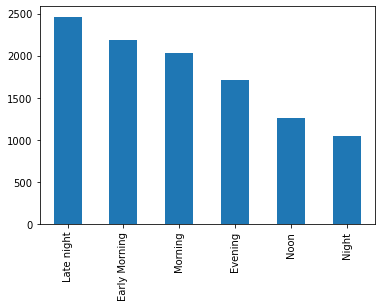

In [28]:
df["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar")

In [29]:
df.head(10)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-05-19 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2023-05-19 11:25:00,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2023-05-19 19:15:00,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [30]:
def preprocess_duration(x):
    if "h" not in x:
        x="0h " +x
    elif "m" not in x:
        x=x+ " 0m"
    return x

In [31]:
df["Duration"] = df["Duration"].apply(preprocess_duration)
df["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [32]:
df["Duration"][0].split(' ')

['2h', '50m']

In [33]:
int(df["Duration"][0].split(' ')[0][0:-1])

2

In [34]:
int(df['Duration'][0].split(' ')[1][0:-1])

50

In [35]:
df["Duration_hours"] = df["Duration"].apply(lambda x:int(x.split(' ')[0][0:-1]) )

In [36]:
df["Duration_mins"] = df["Duration"].apply(lambda x:int(x.split(' ')[1][0:-1]) )

In [37]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-05-19 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [38]:
df["Price"].max()

79512

In [39]:
df["Price"].min()

1759

##### Analysing Duration Impacts on the Price or not?

In [40]:
df[["Duration","Price"]]

,Duration,Price
0,2h 50m,3897
1,7h 25m,7662
2,19h 0m,13882
3,5h 25m,6218
4,4h 45m,13302
...,...,...
10678,2h 30m,4107
10679,2h 35m,4145
10680,3h 0m,7229
10681,2h 40m,12648


In [41]:
df["Duration_total_mins"] = df["Duration"].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [42]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


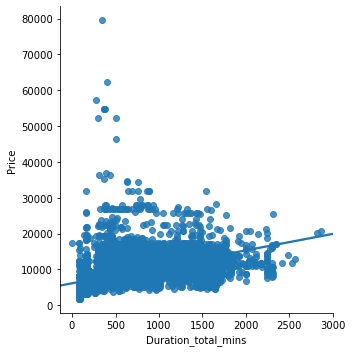

In [43]:
sns.lmplot(x="Duration_total_mins",y="Price",data=df)

#### Which City has maximum final destination of flights?

In [44]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [45]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

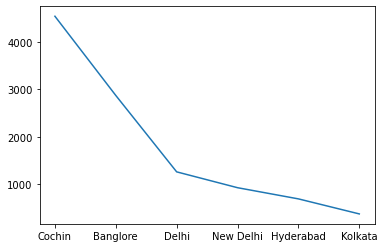

In [46]:
df["Destination"].value_counts().plot()

<AxesSubplot:>

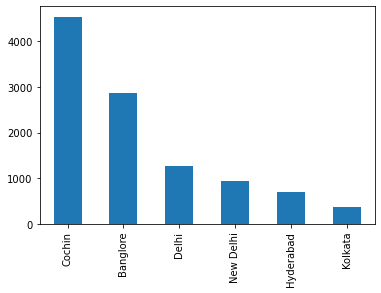

In [47]:
df["Destination"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Destination'>

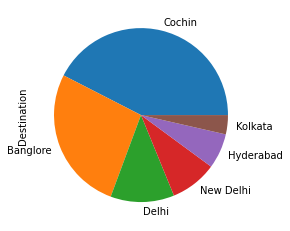

In [48]:
df["Destination"].value_counts().plot(kind="pie")

#### Problem Statement

##### On Which route Jet Airways extremely used?

In [49]:
df[["Airline","Route"]]

,Airline,Route
0,IndiGo,BLR → DEL
1,Air India,CCU → IXR → BBI → BLR
2,Jet Airways,DEL → LKO → BOM → COK
3,IndiGo,CCU → NAG → BLR
4,IndiGo,BLR → NAG → DEL
...,...,...
10678,Air Asia,CCU → BLR
10679,Air India,CCU → BLR
10680,Jet Airways,BLR → DEL
10681,Vistara,BLR → DEL


In [50]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [51]:
df['Airline'].str.contains("Jet Airways").sum()

3855

In [52]:
df[df['Airline'].str.contains("Jet Airways")]

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,2023-05-10 09:20:00,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,2023-05-19 19:00:00,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,7,20,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2023-06-28 19:00:00,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2023-05-28 04:25:00,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-03-13 21:20:00,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,24,45,1485


In [53]:
df[df['Airline'].str.contains("Jet Airways")].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          388
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     40
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           11
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

#### Airline Vs. Price Analysis

Box Plot:

Q1,Q2,Q3,Q4

IQR : Inter Quartile Range = Q3 - Q1

Max = Q3 + 1.5IQR

Min = Q3 - 1.5IQR

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

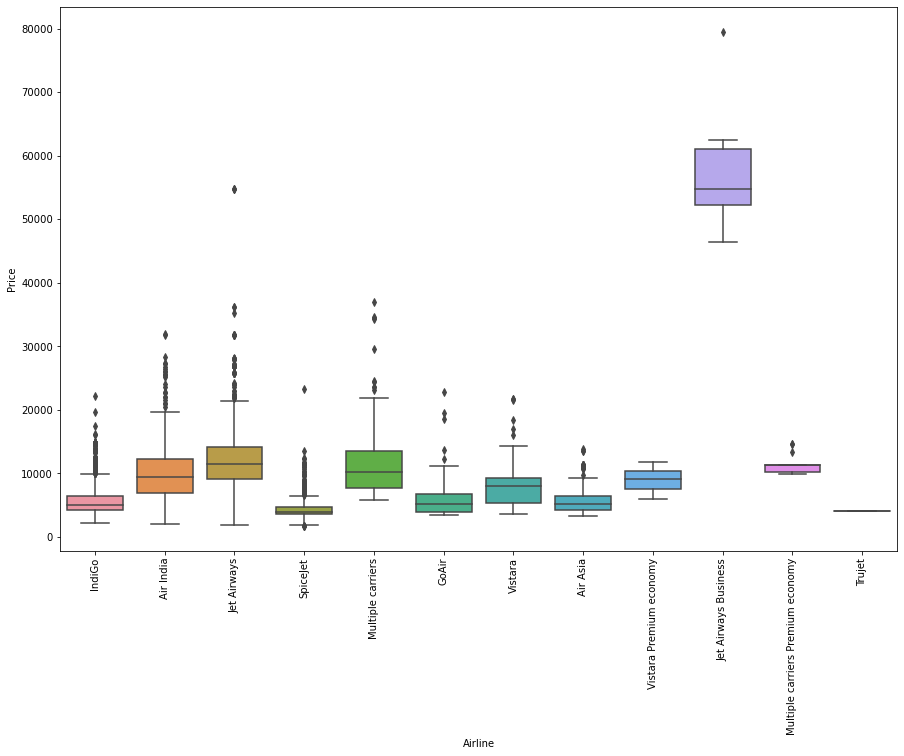

In [54]:
plt.figure(figsize=(15,10))
sns.boxplot(y="Price",x="Airline",data=df)
plt.xticks(rotation="vertical")

In [55]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [56]:
np.round(df["Additional_Info"].value_counts()/len(df)*100)

No info                         78.0
In-flight meal not included     19.0
No check-in baggage included     3.0
1 Long layover                   0.0
Change airports                  0.0
Business class                   0.0
No Info                          0.0
1 Short layover                  0.0
Red-eye flight                   0.0
2 Long layover                   0.0
Name: Additional_Info, dtype: float64

In [57]:
obj_col = [col for col in df.columns if df[col].dtype == "object"]
obj_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [58]:
num_col = [col for col in df.columns if df[col].dtype != "object"]
num_col

['Arrival_Time',
 'Price',
 'Day',
 'Month',
 'Year',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [59]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [60]:
for category in df["Source"].unique():
    df["Source_" + category] = df["Source"].apply(lambda x: 1 if x==category else 0 )

In [61]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-19 23:30:00,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-05-19 21:35:00,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


In [62]:
airlines = df.groupby("Airline")["Price"].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [63]:
dict1 = {key:index for index,key in enumerate(airlines,0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [64]:
df.dtypes

Airline                        object
Source                         object
Destination                    object
Route                          object
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Day                             int64
Month                           int64
Year                            int64
Dep_Time_hour                   int64
Dep_Time_min                    int64
Arrival_Time_hour               int64
Arrival_Time_min                int64
Duration_hours                  int64
Duration_mins                   int64
Duration_total_mins             int64
Source_Banglore                 int64
Source_Kolkata                  int64
Source_Delhi                    int64
Source_Chennai                  int64
Source_Mumbai                   int64
dtype: object

In [65]:
df["Airline"] = df["Airline"].map(dict1)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,2023-05-19 23:30:00,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,New Delhi,BLR → NAG → DEL,2023-05-19 21:35:00,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


In [66]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [67]:
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [68]:
df["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [69]:
dest = df.groupby("Destination")["Price"].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [70]:
dict2 = {key:index for index,key in enumerate(dest,0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [71]:
df["Destination"] = df["Destination"].map(dict2)
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [72]:
stops = {"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4}

In [73]:
df["Total_Stops"] = df["Total_Stops"].map(stops)

In [74]:
df.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2023-03-22 01:10:00,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,2023-05-19 13:15:00,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h 0m,2,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,2023-05-19 23:30:00,5h 25m,1,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,BLR → NAG → DEL,2023-05-19 21:35:00,4h 45m,1,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


### Feature Selection

In [75]:
df.drop(columns=['Source','Route','Duration','Additional_Info'],axis=1,inplace=True)

In [76]:
df.head(3)

,Airline,Destination,Arrival_Time,Total_Stops,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2023-03-22 01:10:00,0,3897,24,3,2019,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2023-05-19 13:15:00,2,7662,5,1,2019,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2023-06-10 04:25:00,2,13882,6,9,2019,9,25,4,25,19,0,1140,0,0,1,0,0


In [77]:
df.dtypes

Airline                         int64
Destination                     int64
Arrival_Time           datetime64[ns]
Total_Stops                     int64
Price                           int64
Day                             int64
Month                           int64
Year                            int64
Dep_Time_hour                   int64
Dep_Time_min                    int64
Arrival_Time_hour               int64
Arrival_Time_min                int64
Duration_hours                  int64
Duration_mins                   int64
Duration_total_mins             int64
Source_Banglore                 int64
Source_Kolkata                  int64
Source_Delhi                    int64
Source_Chennai                  int64
Source_Mumbai                   int64
dtype: object

In [78]:
from sklearn.feature_selection import mutual_info_regression


In [79]:
df = df.drop(["Arrival_Time"],axis=1)

In [80]:
x = df.drop(["Price"],axis=1)

In [81]:
y = df["Price"]

In [82]:
x.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Day                    int64
Month                  int64
Year                   int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Duration_hours         int64
Duration_mins          int64
Duration_total_mins    int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [83]:
mutual_info_regression(x,y)

array([0.98136909, 1.01309257, 0.78975968, 0.18779211, 0.24858758,
       0.        , 0.33981083, 0.26871945, 0.39151247, 0.35796559,
       0.46028008, 0.33838503, 0.49883242, 0.38432942, 0.4566283 ,
       0.5181664 , 0.1367615 , 0.19922774])

In [84]:
imp = pd.DataFrame(mutual_info_regression(x,y), index=x.columns)
imp

,0
Airline,0.990872
Destination,1.005627
Total_Stops,0.788638
Day,0.192970
Month,0.245130
Year,0.000000
Dep_Time_hour,0.345504
Dep_Time_min,0.257392
Arrival_Time_hour,0.397365
Arrival_Time_min,0.355587


In [85]:
imp.columns = ["Importance"]

In [86]:
imp.sort_values(["Importance"],ascending = False)

,Importance
Destination,1.005627
Airline,0.990872
Total_Stops,0.788638
Source_Delhi,0.523561
Duration_total_mins,0.502345
Duration_hours,0.470938
Source_Kolkata,0.452346
Source_Banglore,0.401847
Arrival_Time_hour,0.397365
Arrival_Time_min,0.355587


### Building ML Model

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
ml_model= RandomForestRegressor()

In [91]:
model = ml_model.fit(x_train,y_train)

In [92]:
pred_y = model.predict(x_test)
pred_y

array([16772.24,  5935.88,  8795.25, ...,  3529.31,  6212.16,  7627.39])

In [93]:
pred_y.shape

(2671,)

In [94]:
!pip install pickle
import pickle

ERROR: Could not find a version that satisfies the requirement pickle
ERROR: No matching distribution found for pickle


In [95]:
file=open('rf_random.pk1','wb')

In [96]:
pickle.dump(model,file)

In [97]:
model=open('rf_random.pk1','rb')

In [98]:
forest=pickle.load(model)

In [100]:
forest.predict(x_test)


array([16772.24,  5935.88,  8795.25, ...,  3529.31,  6212.16,  7627.39])

#### Define Evaluation Metric

In [101]:
def mape(y_true,y_pred):
 y_true,y_pred = np.array(y_true), np.array(y_pred)
 
 return np.mean(np.abs((y_true-y_pred)/y_true))*100


In [103]:
mape(y_test,forest.predict(x_test))


13.172561364171623

#### Automate ML Pipeline

In [106]:
def predict(ml_model):
 model = ml_model.fit(x_train, y_train)
 print(f'Training score : {model.score(x_train,y_train)}')
 y_prediction = model.predict(x_test)
 print(f'Prediction : {y_prediction}')
 print('\n')
 
 from sklearn import metrics
 print(f'r2_Score: {metrics.r2_score(y_test,y_prediction)}')
 print(f'MSE: {metrics.mean_squared_error(y_test,y_prediction)}')
 print(f'MAE: {metrics.mean_absolute_error(y_test,y_prediction)}')
 print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_test,y_prediction))}')
 print(f'MAPE: {mape(y_test,y_prediction)}')
 sns.distplot(y_test-y_prediction)

Training score : 0.9522164280029551
Prediction : [16761.25  5949.31  8943.11 ...  3549.22  6312.46  7556.17]


r2_Score: 0.8141186137154077
MSE: 3831577.9262060383
MAE: 1173.8787064865644
RMSE: 34.261913351220834
MAPE: 13.130362589883948


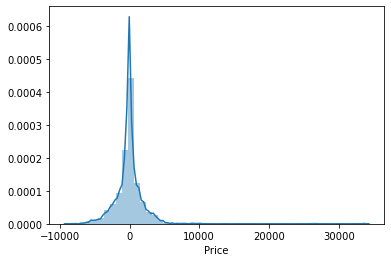

In [107]:
predict(RandomForestRegressor())

#### Hypertune ML Model

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
reg_rf = RandomForestRegressor()

In [110]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [111]:
[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]


[1000, 1040, 1080, 1120, 1160, 1200]

In [112]:
[int(x) for x in np.linspace(start=5,stop=10,num=4)]


[5, 6, 8, 10]

In [113]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start=5,stop=10,num=4)]
min_samples_split=[5,10,15,100]
 
max_features=['auto', 'sqrt']


In [114]:
random_grid = {
 'n_estimators': n_estimators,
 'max_depth': max_depth,
 'max_features': max_features,
 'min_samples_split': min_samples_split
}


In [115]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_depth': [5, 6, 8, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100]}

In [116]:
rf_random = RandomizedSearchCV(reg_rf, param_distributions=random_grid, cv=3, verbose=2)
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [118]:
rf_random.fit(x_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1080, min_samples_split=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1080, min_samples_split=10, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1080, min_samples_split=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=1080, min_samples_split=10, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=1080, min_samples_split=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1080, min_samples_split=10, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1120, min_samples_split=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1120, min_samples_split=5, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=1120, min_samples_split=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1120, min_samples_split=5, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1120, min_samples_split=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1120, min_samples_split=5, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=15, max_features=auto, max_depth=6 
[CV]  n_estimators=1200, min_samples_split=15, max_features=auto, max_depth=6, total=   8.5s
[CV] n_estimators=1200, min_samples_split=15, max_features

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [119]:
rf_random.best_params_

{'n_estimators': 1120,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [121]:
pred2=rf_random.predict(x_test)
pred2

array([16421.47634849,  6003.16982127,  8655.71544859, ...,
        4222.45901422,  7959.8112877 ,  7389.65969378])

In [122]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8241879519009733